### Data Visualization Notebook

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pubchempy
import pandas as pd
from itertools import compress
import seaborn as sns
from matchms.importing import load_from_mgf

from rdkit import Chem
from rdkit.Chem import Draw


from matchms import calculate_scores
from matchms.plotting.spectrum_plots import plot_spectra_mirror, plot_spectrum


from matplotlib import animation, rc
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
path_data = "../data"

print("Load reference and query data.")
file_mgf_reference = os.path.join(path_data, "ex_spectra_stds_NEG_scans_50.mgf")
reference_spectra = list(load_from_mgf(file_mgf_reference))

file_mgf_query = os.path.join(path_data, "pseudo_query_neg_v1.mgf")
query_spectra = list(load_from_mgf(file_mgf_query))

print(f"Detected {len(reference_spectra)} reference spectra and {len(query_spectra)} query spectra.")

Load reference and query data.
Detected 968 reference spectra and 1614 query spectra.


[]

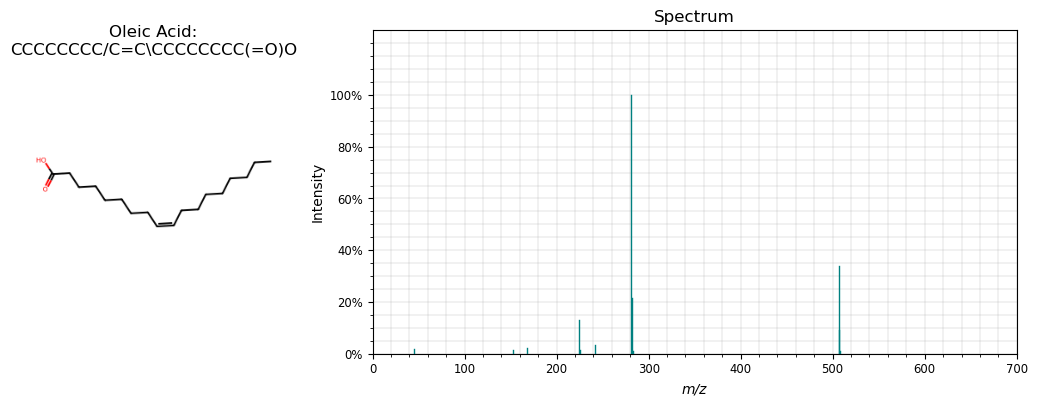

In [3]:
example_query_number = 1392
example_spectrum = query_spectra[example_query_number]
example_smiles = "CCCCCCCC/C=C\CCCCCCCC(=O)O"

fig, axs = plt.subplots(1, 2, figsize=(12.8, 4.2), gridspec_kw={'width_ratios': [2, 5]}, sharey=False)


# Compound
img = Chem.Draw.MolToImage(Chem.MolFromSmiles(example_smiles), ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title("Oleic Acid:\n" + example_smiles)
axs[0].imshow(img)
axs[0].axis("off")

# Spectrum
plot_spectrum(example_spectrum, axs[1])
plt.plot()

In [4]:
%%capture
example_spectrum = query_spectra[example_query_number]
example_smiles = "CCCCCCCC/C=C\CCCCCCCC(=O)O"

fig, axs = plt.subplots(1, 2, figsize=(12.8, 4.2), gridspec_kw={'width_ratios': [2, 5]}, sharey=False)




# Spectrum animation
camera = Camera(fig)# the camera gets our figure
for i in range(5):
    # Compound
    img = Chem.Draw.MolToImage(Chem.MolFromSmiles(example_smiles), ax=axs[0])

    axs[0].grid(False)
    axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
    axs[0].set_title("Oleic Acid:\n" + example_smiles)
    axs[0].imshow(img)
    axs[0].axis("off")
    
    # animation
    spec = query_spectra[example_query_number - 2 + i]
    plot_spectrum(spec, axs[1])
    axs[1].text(1, 1.2, "Collsion Energy: " + spec.metadata["collision_energy"]) # making the dynamic title
    camera.snap()

animation = camera.animate(blit=False, interval=800)
rc('animation', html='html5')

In [5]:
#display(HTML(animation.to_html5_video()))
animation.save('../img/spectrum_CE.gif')

![GIF](../img/spectrum_CE.gif "segment")

#### Metadata

In [6]:
# Treat Libraries in pandas DataFrames
Q = pd.DataFrame({"spectrum": query_spectra, "library": "query"})
R = pd.DataFrame({"spectrum": reference_spectra, "library": "reference"})


def extract_metadata(df, keys):
    for key in keys:
        df[key] = df["spectrum"].apply(lambda x: x.get(key))
    

extract_metadata(Q, Q["spectrum"][0].metadata.keys())
extract_metadata(R, R["spectrum"][0].metadata.keys())
M = pd.concat([Q, R])



In [7]:
Q.head()

,spectrum,library,title,mslevel,scans,scanindex,centroided,polarity,precscannum,pepmass,...,basepeakmz,basepeakintensity,ionisationenergy,lowmz,highmz,injectiontime,feature_id,retention_time,collision_energy,precursor_mz
0,<matchms.Spectrum.Spectrum object at 0x7f37ba5...,query,msLevel 2; retentionTime ; scanNum,2,1,1,TRUE,0,1,"(112.98553637, None)",...,68.99723544,656,0,68.99723544,68.99723544,0,FT1,247.3932,10,112.985536
1,<matchms.Spectrum.Spectrum object at 0x7f37ba5...,query,msLevel 2; retentionTime ; scanNum,2,2,2,TRUE,0,2,"(112.98557467, None)",...,45.00066804,268,0,45.00066804,45.00066804,0,FT2,377.1270,20,112.985575
2,<matchms.Spectrum.Spectrum object at 0x7f37ba5...,query,msLevel 2; retentionTime ; scanNum,2,3,3,TRUE,0,3,"(112.98557452, None)",...,44.99716261,314,0,44.99716261,44.99716261,0,FT3,258.8022,30,112.985575
3,<matchms.Spectrum.Spectrum object at 0x7f37ba5...,query,msLevel 2; retentionTime ; scanNum,2,4,4,TRUE,0,4,"(112.98552874, None)",...,44.99853363,266,0,44.99853363,44.99853363,0,FT4,278.4588,40,112.985529
4,<matchms.Spectrum.Spectrum object at 0x7f37ba5...,query,msLevel 2; retentionTime ; scanNum,2,5,5,TRUE,0,5,"(129.05574413, None)",...,129.05973069,220,0,129.05973069,519.2963068,0,FT5,172.1430,10,129.055744


In [8]:
# Define plot colors
color_palette = sns.light_palette("seagreen", 5)
default_color = color_palette[-1]

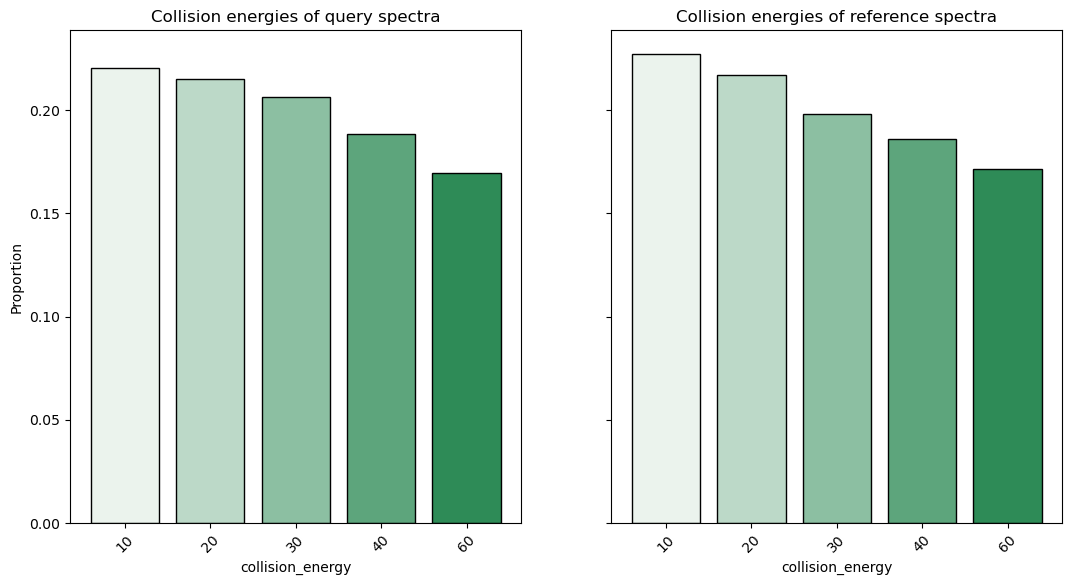

In [9]:

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
fig.set_tight_layout(False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)


axs[1].set_ylabel("")
plot = sns.histplot(ax=axs[0], data=Q, x='collision_energy', edgecolor="black", stat="proportion", shrink=0.8)

for bin_,i in zip(plot.patches,color_palette):
    bin_.set_facecolor(i)
    
    
plot = sns.histplot(ax=axs[1], data=R, x='collision_energy', edgecolor="black", stat="proportion", shrink=0.8)
for bin_,i in zip(plot.patches,color_palette):
    bin_.set_facecolor(i)


axs[0].set_title("Collision energies of query spectra")
axs[1].set_title("Collision energies of reference spectra")
plt.show()

Text(0.5, 0, 'Num of missing collision energies')

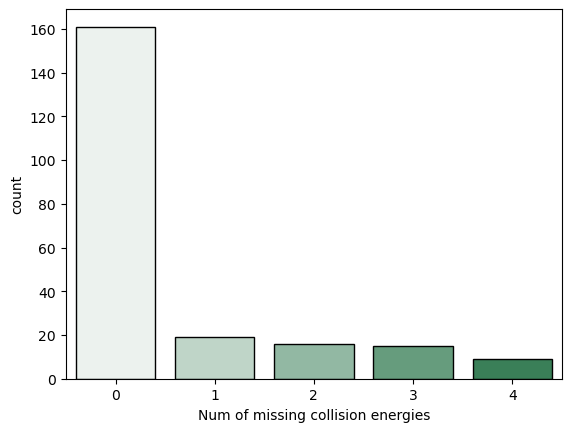

In [10]:
R_pivot = R[["compound_name", "collision_energy", "precursor_mz"]].pivot(index="compound_name", columns="collision_energy")

R_pivot["num_nan"] = R_pivot.apply(lambda x: sum(np.isnan(x)), axis=1)
R_pivot
sns.countplot(data=R_pivot, x="num_nan", palette=color_palette, edgecolor="black")
plt.xlabel("Num of missing collision energies")



<AxesSubplot: xlabel="('precursor_mz', '10')", ylabel='num_nan'>

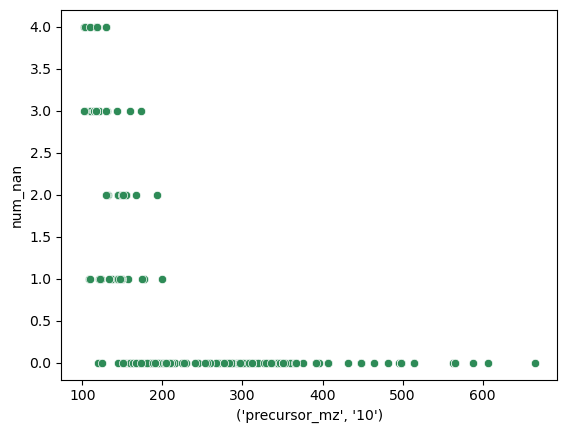

In [11]:
R_pivot.columns
sns.scatterplot(data=R_pivot, x=('precursor_mz', '10'), y="num_nan", color=default_color)

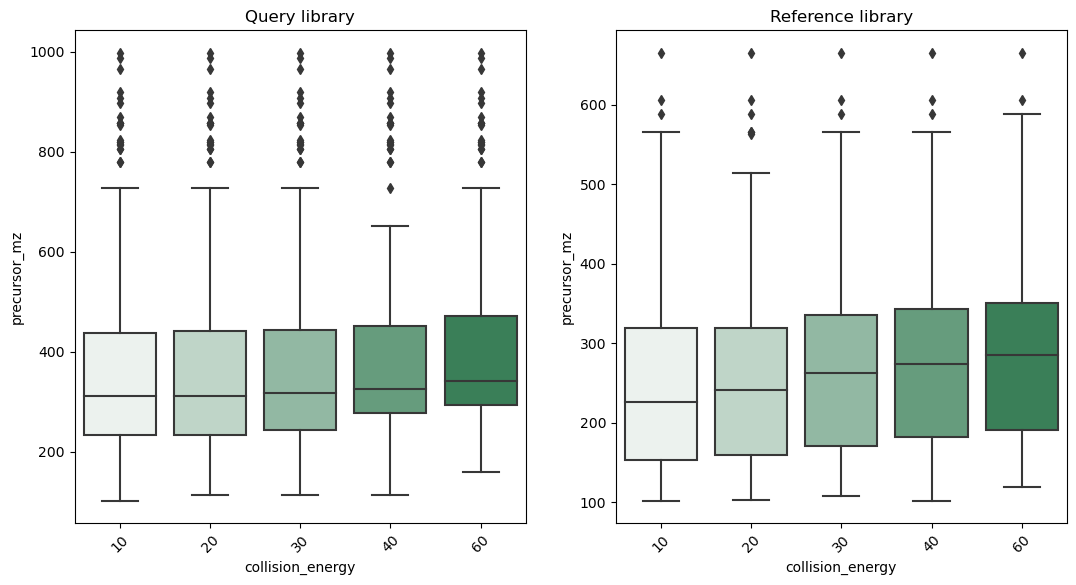

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1]}, sharey=False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)

sns.boxplot(ax=axs[0], data=Q, y='precursor_mz', palette=color_palette, x="collision_energy")
sns.boxplot(ax=axs[1], data=R, y='precursor_mz', palette=color_palette, x="collision_energy")

axs[0].set_title("Query library")
axs[1].set_title("Reference library")
plt.show()

Retention Times

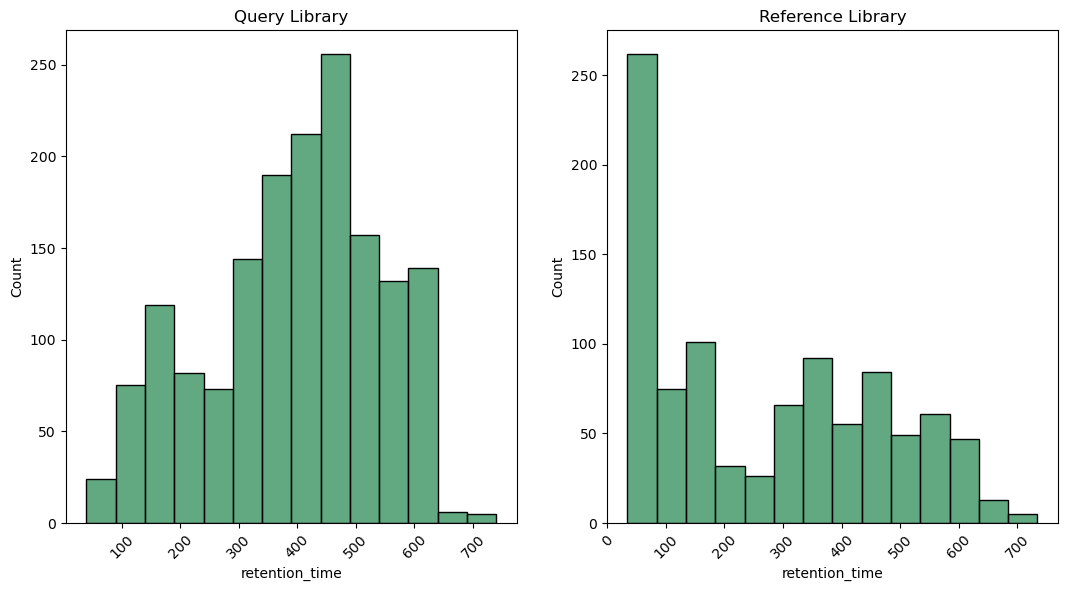

In [13]:

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1]}, sharey=False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)

sns.histplot(ax=axs[0], data=Q, x='retention_time', color=default_color, binwidth=50)
sns.histplot(ax=axs[1], data=R, x='retention_time', color=default_color, binwidth=50)

axs[0].set_title("Query Library")
axs[1].set_title("Reference Library")
plt.show()


/home/ynowatzk/anaconda3/envs/hackathon/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


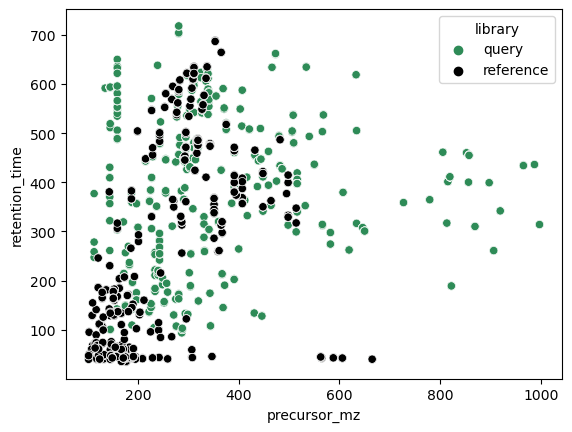

In [14]:
sns.scatterplot(data=M, y="retention_time", x="precursor_mz", hue="library", palette=[default_color, "black"])
plt.show()


Examine peak counts

In [15]:
Q["peak_count"] = Q["spectrum"].apply(lambda x: len(x.peaks))
Q["totioncurrent"] = Q["totioncurrent"].astype(int) 

Q["log_totioncurrent"] = Q["totioncurrent"].apply(np.log) 

R["peak_count"] = R["spectrum"].apply(lambda x: len(x.peaks))
R["totioncurrent"] = R["totioncurrent"].astype(int) 

R["log_totioncurrent"] = R["totioncurrent"].apply(np.log) 

M["peak_count"] = M["spectrum"].apply(lambda x: len(x.peaks))
M["totioncurrent"] = M["totioncurrent"].astype(int) 
M["log_totioncurrent"] = M["totioncurrent"].apply(np.log) 





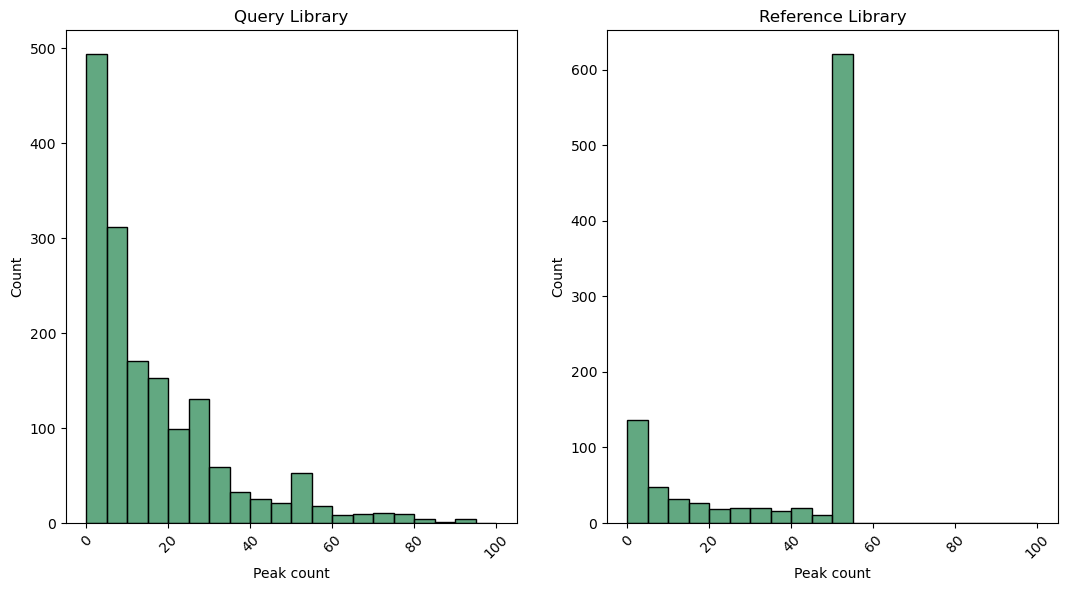

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1]}, sharey=False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)
    ax.set_xlabel("Peak count")

sns.histplot(ax=axs[0], data=Q, x='peak_count', color=default_color, binwidth=5, binrange=[0, 100])
sns.histplot(ax=axs[1], data=R, x='peak_count', color=default_color, binwidth=5, binrange=[0, 100])

axs[0].set_title("Query Library")
axs[1].set_title("Reference Library")
plt.show()

<AxesSubplot: xlabel='log_totioncurrent', ylabel='Count'>

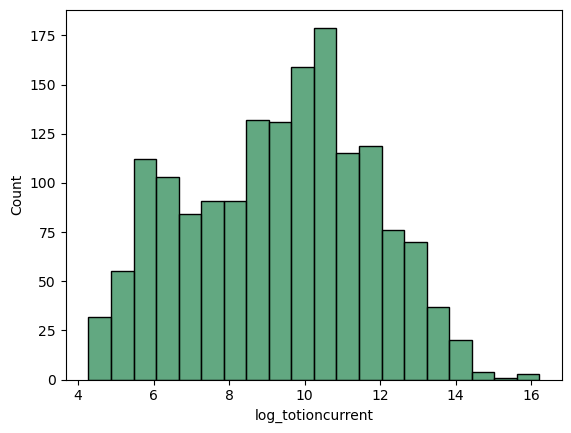

In [17]:
#Q["totioncurrent"] = Q["totioncurrent"].astype(int)
Q["log_totioncurrent"] = Q["totioncurrent"].apply(np.log)
sns.histplot(Q, x="log_totioncurrent", color=default_color)
#Q["totioncurrent"]

/home/ynowatzk/anaconda3/envs/hackathon/lib/python3.10/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


<AxesSubplot: xlabel='precursor_mz', ylabel='log_totioncurrent'>

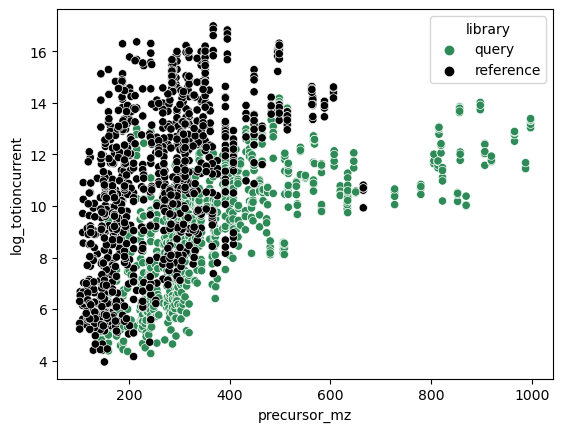

In [18]:
sns.scatterplot(data=M, y="log_totioncurrent", x="precursor_mz", hue="library", palette=[default_color, "black"])

